In [6]:
# pyrates imports
from pyrates.ir.circuit import CircuitIR
from pyrates.backend import ComputeGraph
from pyrates.utility import plot_timeseries
from pyrates.frontend import CircuitTemplate

# additional imports
import numpy as np
from pandas import DataFrame, MultiIndex
import matplotlib.pyplot as plt
import matplotlib.pyplot as plt
import matplotlib as mpl
plt.style.reload_library()
plt.style.use('ggplot')
mpl.rcParams['lines.linewidth'] = 2
mpl.rcParams['axes.titlesize'] = 20
mpl.rcParams['axes.labelsize'] = 28
mpl.rcParams['axes.labelcolor'] = 'black'
mpl.rcParams['axes.labelweight'] = 'bold'
mpl.rcParams['xtick.labelsize'] = 28
mpl.rcParams['ytick.labelsize'] = 20
mpl.rcParams['xtick.color'] = 'black'
mpl.rcParams['ytick.color'] = 'black'
mpl.rcParams['legend.fontsize'] = 20
from copy import deepcopy

%matplotlib inline

In [7]:
# parameter definition
dt = 5e-4
T = 3.
C = np.array([68., 128., 135., 270., 675., 1350.])
inp = np.random.uniform(120., 320., (int(T/dt), 1))

def adjust_weights(c, net):
    for s, t, e in net.edges:
        net.edges[s, t, e]['weight'] *= c

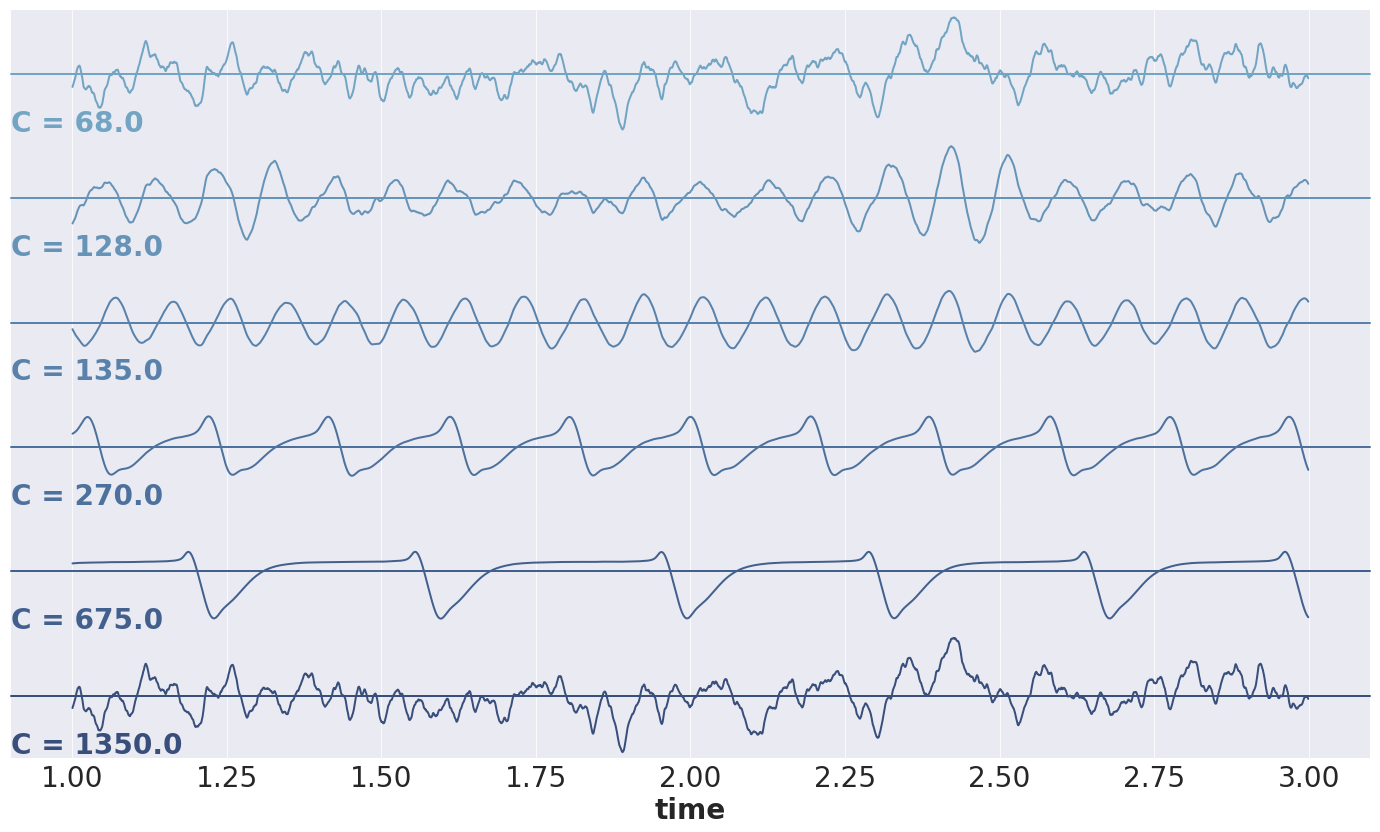

In [9]:
# pyrates simulation
results = []
for c in C:
    jrc_config = CircuitTemplate.from_yaml("pyrates.examples.jansen_rit.simple_jr.JRC").apply()
    adjust_weights(c/135., jrc_config)
    jrc_model = ComputeGraph(jrc_config, dt=dt, vectorization='nodes')
    result, _ = jrc_model.run(simulation_time=T, outputs={f'C_{c}': ('PC', 'PRO.0', 'PSP')},
                              inputs={('PC', 'RPO_e_pc.0', 'u'): inp}, verbose=False)
    results.append(result)

df = DataFrame()
for r, c in zip(results, C):
    df[f'C = {c}'] = r.iloc[r.index > 1.0, 0]
plot_timeseries(df, plot_style='ridge_plot', demean=True, light=0.6, dark=0.3, hue=.95, n_colors=6, hspace=-.01,
                fontsize=28, start=-3.0, rot=-0.2, aspect=10, height=2.0)
plt.savefig('PyRates_JansenRit_example_1.svg', format='svg')

/home/rgast/Software/anaconda3/envs/pyrates/lib/python3.6/site-packages/ipykernel_launcher.py:26: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
/home/rgast/Software/anaconda3/envs/pyrates/lib/python3.6/site-packages/ipykernel_launcher.py:27: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
/home/rgast/Software/anaconda3/envs/pyrates/lib/python3.6/site-packages/ipykernel_launcher.py:26: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats

KeyError: 'k'

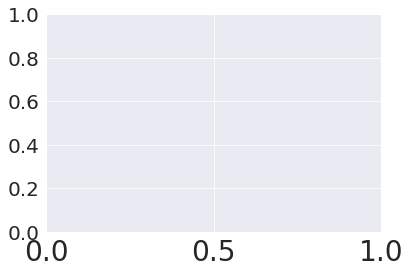

In [5]:
# additional parameters
k = np.array([5., 15., 45., 135.])
inp = np.random.uniform(120., 320., (int(T/dt), 2))

# pyrates simulation
results = []
for c in k:
    template = CircuitTemplate.from_yaml("pyrates.examples.jansen_rit.simple_jr.JRC").apply()
    jrc_config = CircuitIR()
    jrc_config.add_circuit('jrc_0', template)
    jrc_config.add_circuit('jrc_1', template)
    jrc_config.add_edges_from([['jrc_0/PC/PRO/m_out', 'jrc_1/PC/RPO_e_pc/m_in', {'weight': c}],
                               ['jrc_1/PC/PRO/m_out', 'jrc_0/PC/RPO_e_pc/m_in', {'weight': c}]])
    jrc_model = ComputeGraph(jrc_config, dt=dt, vectorization='nodes')
    result, _ = jrc_model.run(simulation_time=T, outputs={'PSP': ('PC', 'PRO.0', 'PSP')},
                              inputs={('PC', 'RPO_e_pc.0', 'u'): inp}, verbose=False)
    results.append(result)

out_vars = []
for c in k:
    out_vars.append((f'k = {c}', 'PC1'))
    out_vars.append((f'k = {c}', 'PC2'))
index = MultiIndex.from_tuples(out_vars, names=['k', 'node'])
df = DataFrame(columns=index)
for r, c in zip(results, k):
    df[f'k = {c}']['PC1'] = r.iloc[r.index > 1.0, 0]
    df[f'k = {c}']['PC1'] = r.iloc[r.index > 1.0, 1]
plot_timeseries(df, plot_style='ridge_plot', demean=True, light=0.6, dark=0.3, hue=.95, n_colors=4, hspace=-.01,
                fontsize=28, start=-1.85, rot=-0.2, aspect=10, height=2.0, facet_hue='node', facet_row='k')
plt.savefig('PyRates_JansenRit_example_2.svg', format='svg')